# TensorflowMobile implementation - Workflow

- Based on 'TensorFlow for Poets2' CodeLab (https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/#0)
- *Working Directory* is set as C:\Users\thochewa\jupyterNotebooks\retrain

Below code 
* retrains a mobile model
* allows supervision in TensorBoard, and 
* implements in Dummy App

In [ ]:
# Check that Bees images are in the right directory
ls bees

### Starting TensorBoard
*Check Shell* for correct localhost address!

In [ ]:
# Had to run this in the Conda Shell
!tensorboard --logdir C:/Users/thochewa/jupyterNotebooks/retrain/training_summaries &

In [24]:
# Check Helpfile for retrain model
!python C:/Users/thochewa/jupyterNotebooks/scripts/  retrain.py -h

usage: retrain.py [-h] [--image_dir IMAGE_DIR] [--output_graph OUTPUT_GRAPH]
                  [--intermediate_output_graphs_dir INTERMEDIATE_OUTPUT_GRAPHS_DIR]
                  [--intermediate_store_frequency INTERMEDIATE_STORE_FREQUENCY]
                  [--output_labels OUTPUT_LABELS]
                  [--summaries_dir SUMMARIES_DIR]
                  [--how_many_training_steps HOW_MANY_TRAINING_STEPS]
                  [--learning_rate LEARNING_RATE]
                  [--testing_percentage TESTING_PERCENTAGE]
                  [--validation_percentage VALIDATION_PERCENTAGE]
                  [--eval_step_interval EVAL_STEP_INTERVAL]
                  [--train_batch_size TRAIN_BATCH_SIZE]
                  [--test_batch_size TEST_BATCH_SIZE]
                  [--validation_batch_size VALIDATION_BATCH_SIZE]
                  [--print_misclassified_test_images] [--model_dir MODEL_DIR]
                  [--bottleneck_dir BOTTLENECK_DIR]
                  [--final_tensor_name FINAL_TE

C:\Users\thochewa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Instructions for updating:
Use the retry module or similar alternatives.


### Running retrain model

*Important Note* 
* for experimentation with hyper parameters, rename '--summaries_dir' entry
* Learning rate of 0.1 could be '--summaries_dir=training_summaries/LR0.1'

In [ ]:
# Ran in Conda shell
python C:/Users/thochewa/jupyterNotebooks/scripts/retrain.py --bottleneck_dir=C:/Users/thochewa/jupyterNotebooks/retrain/bottlenecks --how_many_training_steps=1000 --model_dir=C:/Users/thochewa/jupyterNotebooks/retrain/models/ --summaries_dir=C:/Users/thochewa/jupyterNotebooks/retrain/training_summaries/"$mobilenet_1.0_224"  --output_graph=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/retrained_graph.pb --output_labels=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/retrained_labels.txt --architecture=mobilenet_1.0_224 --image_dir=C:/tensorflow/tensorflow/flower_photos

### Optimize Model for Mobile Phone Application
This part is based on but modified from the TensorForPoets for Mobile Application Tutorial (https://codelabs.developers.google.com/codelabs/tensorflow-for-poets-2/#0)

In [ ]:
!python -m tensorflow.python.tools.optimize_for_inference --input=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/retrained_graph.pb --output=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/optimized_graph.pb --input_names="input" --output_names="final_result"

### Verification of Optimized model
- The Goal here is to compress the model and get rid of excessive nodes
- The results of trained and optimized models should be the same

In [ ]:
!python C:/Users/thochewa/jupyterNotebooks/scripts/label_image.py --graph=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/retrained_graph.pb --image=C:/tensorflow/tensorflow/flower_photos/daisy/21652746_cc379e0eea_m.jpg --labels=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/retrained_labels.txt
                
!python C:/Users/thochewa/jupyterNotebooks/scripts/label_image.py --graph=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/optimized_graph.pb --image=C:/tensorflow/tensorflow/flower_photos/daisy/21652746_cc379e0eea_m.jpg --labels=C:/Users/thochewa/jupyterNotebooks/retrain/outputs/retrained_labels.txt                
                

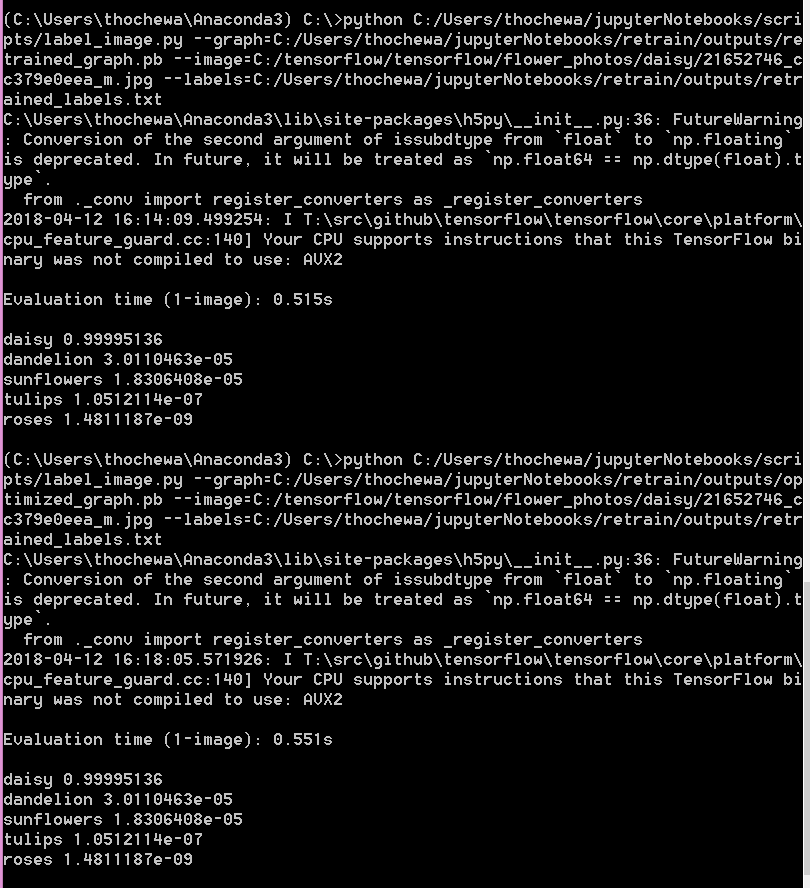

### Add graphs to summaries folder to be monitored in Tensorboard
Retrained and optimized graphs are added to output directories

In [ ]:
python C:/Users/thochewa/jupyterNotebooks/scripts/graph_pb2tb.py C:/Users/thochewa/jupyterNotebooks/retrain/training_summaries/retrained C:/Users/thochewa/jupyterNotebooks/retrain/outputs/retrained_graph.pb 

python C:/Users/thochewa/jupyterNotebooks/scripts/graph_pb2tb.py C:/Users/thochewa/jupyterNotebooks/retrain/training_summaries/optimized C:/Users/thochewa/jupyterNotebooks/retrain/outputs/optimized_graph.pb

### Tensorboard Overview
Comparison of the two newly added graphs can be found in the "Graphs" Tab of TensorBoard

## Further Compression of Model for mobile applications
Process is similar to downsizing the amount of colours displayed in an image - no effect on CNN itself